In [45]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animatio
n = 200
x = np.linspace(0,10,n+1)
t = 2
delt = 0.01
nt = int(t/delt)
delx = 10/n

In [3]:
# Initial Condition:
u = np.zeros(n+1)
# u[n//4:n//2+1] = np.linspace(0,1,n//4+1)
# u[n//2:3*n//4] = np.linspace(1,0,n//4)
u[n//5:2*n//5 + 1] = 1
u[3*n//5:4*n//5 + 1] = 1

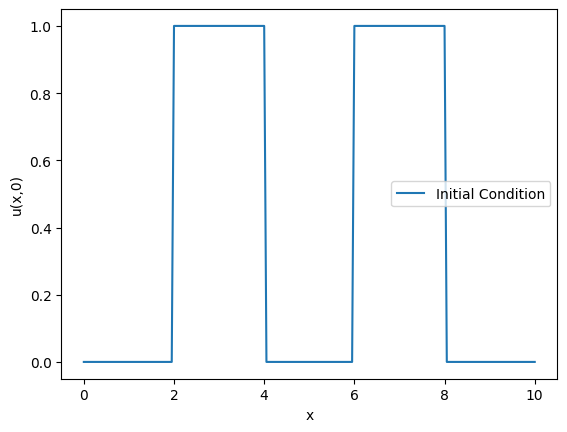

In [4]:
plt.plot(x,u,label='Initial Condition')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,0)')
plt.show()

In [5]:
tx = delt/delx
up = np.zeros(n+1)
um = np.zeros(n+1)
u_view = np.zeros((nt, n+1))
u_view[0,:] = u.copy()

In [9]:
m = range(1,n)
mp = range(2,n+1)
mm = range(0,n-1)
for t in range(0,nt-1):
    # u[1:n] = u[1:n] + tx*u[1:n]*(u[1:n]-u[2:n+1])
    up[1:n] = 0.5*(u_view[t,m] + abs(u_view[t,m]))*u_view[t,m]*0.5
    um[1:n] = 0.5*(u_view[t,m] - abs(u_view[t,m]))*u_view[t,m]*0.5
    fi1 = up[m] + um[mp]
    fi  = up[mm] + um[m]
    u_view[t+1,m] = u_view[t,m] - tx*(fi1 - fi)

In [53]:
fig = plt.figure(figsize=(10, 6))
def anim(j):
    plt.cla()
    plt.plot(x,u,label='Initial Condition')
    plt.plot(x,u_view[j,:],label='Final Condition',linestyle="--")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title(f"Time = {j*delt:.2f} seconds")
    # plt.show()
anims = animatio.FuncAnimation(fig, anim, frames=nt, repeat=False, interval=1)
anims.save('animation.gif', writer='pillow', fps=3)
# plt.show()

<IPython.core.display.Javascript object>

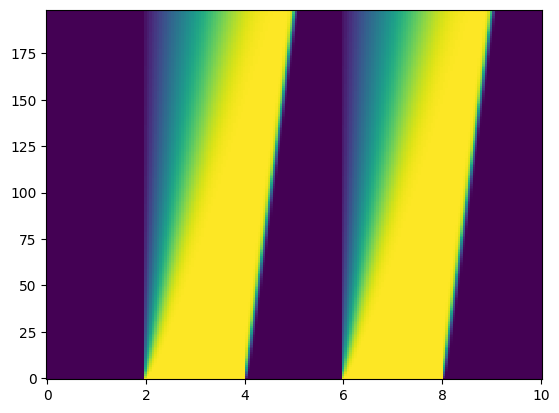

In [7]:
plt.pcolor(x,np.linspace(0,t,nt),u_view,shading='auto')
plt.show()